# Entendendo o $ \chi ^2 $ 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Dados para produzir uma reta:
x =np.asarray([0, 0.2, 0.4, 0.6, 0.8, 1.0])
y =np.asarray([1, 1.25, 1.35, 1.6, 1.82, 1.95])

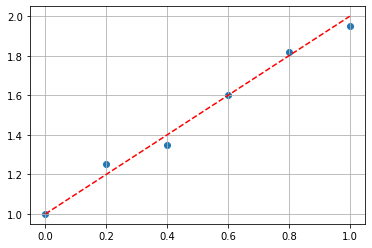

In [4]:
plt.scatter(x,y)
plt.plot(x,x+1.0, ls='--', c='r') #reta de referência, usada para construir os dados do zero
plt.grid()
plt.show()

In [5]:
# Determinando o melhor ajuste:
z = np.polyfit(x,y,deg=1, cov=True)

In [6]:
z

(array([0.95857143, 1.01571429]), array([[ 0.00233878, -0.00116939],
        [-0.00116939,  0.00085755]]))

In [7]:
#parâmetros de ajuste:
a = z[0][0]
b = z[0][1]

In [8]:
# Erros: 
sigma_a = np.sqrt(z[1][0][0])
sigma_b = np.sqrt(z[1][1][1])

In [9]:
print(a, sigma_a)
print(b, sigma_b)

0.9585714285714281 0.04836088822803068
1.0157142857142856 0.029283972073613263


In [11]:
#Construindo o chi^2:

def chi2(a,b, x_data,y_data):
    chi = 0.0
    N = len(x)
    for i in range(N):
        delta = (a*x_data[i] + b - y_data[i])**2
        chi = chi + delta
    return chi/(N-2) # chi reduzido

chi2(a,b,x,y)

0.0016371428571428565

In [12]:
x_a = np.linspace(a-0.05,a+0.05,200)
x_b = np.linspace(b-0.05,b+0.05,200)

In [13]:
xx, yy = np.meshgrid(x_a,x_b)

In [14]:
z = chi2(xx,yy,x,y)/chi2(a,b,x,y)

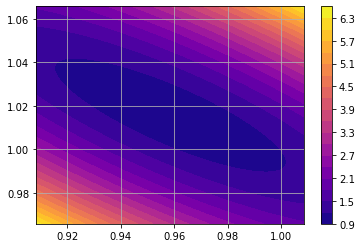

In [15]:
plt.contourf(xx,yy,z, levels = 20,cmap='plasma')
plt.grid()
plt.colorbar()

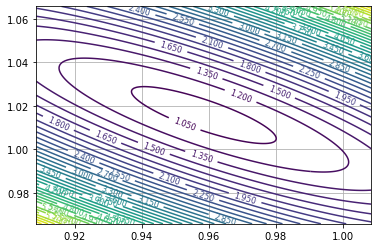

In [16]:
cs =plt.contour(xx,yy,z, levels = 50, vmin=1)
plt.clabel(cs, fontsize=8)
plt.grid()